In [1]:
from dyn_net.dynamical_systems import get_drift
from dyn_net.noise import get_noise
from dyn_net.integrator.euler_maruyama import euler_maruyama_isotropic

In [21]:
params_double_well_single = {
    'alpha_rot' : 0.0
}
params_noise = {
    'sigma' : 0.3
}

In [22]:
F, pF = get_drift("double_well_single", params_double_well_single)
G, pG = get_noise("additive_gaussian", params_noise)

In [23]:
import numpy as np
t, x = euler_maruyama_isotropic(F, G, x0=np.array([-1, 0.2]), tmin=0, tmax=1000, dt=0.001, params_F=pF, params_G=pG)

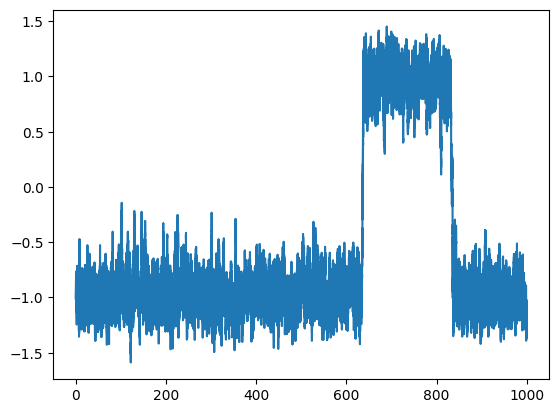

In [24]:
from matplotlib import pyplot as plt
plt.plot(t,x[:,0])